<a href="https://colab.research.google.com/github/asifazehra/Digital-Image-Processing/blob/main/CV_moduls_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision  5th Module project



In [ ]:
# load libraries, basic
import numpy as np
import pandas as pd
import matplotlib as plt


In [ ]:
# Using Keras and Sklearn for Model Imp and check
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import tensorflow as tf
#import tensorflow to provide different libary to building
# and training different ML models and Neural Network.
import cv2
# cv2 stand for Opencv(open source computer vision) this is the libray to interact
# with pictures and videos processing
from os.path import split
# os Stand for Operating system. it interact with system file such as deleting,
# and modification and check directories
import matplotlib.image as mpimg

In [ ]:
# unzip and Cv packages
import os
import cv2


# Load the Data from Google Drive


In [ ]:
# !7za -y x "/content/drive/MyDrive/data/image"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/data/                                      1 folder, 8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg                                      0% 9 - origin/afra

The Expression in-the-Wild (ExpW) dataset is for facial expression recognition and contains 91,793 faces manually labeled with expressions. Each of the face images is annotated as one of the seven basic expression categories: “angry”, “disgust”, “fear”, “happy”, “sad”, “surprise”, or “neutral”.

# **Loading the extracted images from google drive**

In [ ]:
# !cp -r ./origin/ "/content/drive/MyDrive/extracted-images"

## Readed label and image files

In [ ]:
label_file_name=r"/content/drive/MyDrive/data/label/label.lst"
image_file_name=r"/content/drive/MyDrive/extracted-images/origin"

# Make column's name acoording to Readme file.

In [ ]:
df = pd.read_csv(label_file_name, sep=" ", header=None)

col_names = "image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_confidence expression_label".split()

df.columns = col_names
data_path = "/content/drive/MyDrive/origin"
# To show first Five rows
df.head()

image_name  face_id_in_image  face_box_top  face_box_left  \
0  angry_actor_104.jpg                 0            28            113   
1  angry_actor_109.jpg                 0            31            157   
2  angry_actor_120.jpg                 1            53             53   
3   angry_actor_13.jpg                 0            77             51   
4  angry_actor_132.jpg                 0            95             31   

   face_box_right  face_box_bottom  face_box_confidence  expression_label  
0             226              141              22.9362                 0  
1             345              219              50.3056                 0  
2             372              372              13.9434                 2  
3             362              388              85.8104                 3  
4             412              476              82.3948                 0

In [ ]:
# To check data shape
df.shape

(91793, 8)

# To save This changes in google drive

In [ ]:
from google.colab import drive

In [ ]:
df.to_csv('/content/drive/MyDrive/df.csv', index=False)

In [ ]:
df_verify = pd.read_csv('/content/drive/MyDrive/df.csv')
print(df_verify)

                         image_name  face_id_in_image  face_box_top  \
0               angry_actor_104.jpg                 0            28   
1               angry_actor_109.jpg                 0            31   
2               angry_actor_120.jpg                 1            53   
3                angry_actor_13.jpg                 0            77   
4               angry_actor_132.jpg                 0            95   
...                             ...               ...           ...   
91788  surprised_expression_546.jpg                 0            70   
91789  surprised_expression_381.jpg                 0            51   
91790  surprised_expression_395.jpg                 0            27   
91791         ecstatic_asian_31.jpg                 0            60   
91792  surprised_expression_394.jpg                 0            47   

       face_box_left  face_box_right  face_box_bottom  face_box_confidence  \
0                113             226              141              22

# **Introducation**
In this research, the focus is on understanding and quantifying fine-grained and high-level interpersonal traits between individuals using face images. The researchers propose a deep network architecture that robustly recognizes facial expressions. Unlike conventional models that only learn from facial expression labels, their multitask network also incorporates auxiliary attributes like gender, age, and head pose for improved learning. They introduce a novel attribute propagation method that relaxes the need for complete attribute labels in the training dataset. This allows the network to leverage the inherent relationships between different attribute sources despite their differing distributions. The proposed approach achieves state-of-the-art results on facial expression recognition benchmarks. For predicting interpersonal relations, they use the expression recognition network as branches for a Siamese model, enabling accurate and fine-grained prediction of the association between individuals. Extensive experiments demonstrate the effectiveness of their model in mining mutual context from face images to predict interpersonal relations with high accuracy.

# Create saven expression on labels as new data

In [ ]:
import os
label_names = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
new_data = "/content/drive/MyDrive/processed_data"
os.makedirs(new_data, exist_ok=True)
for lbl in label_names:
  os.makedirs(os.path.join(new_data, lbl), exist_ok=True)

# **Data Preprocessed**

In [ ]:
import os
import shutil
img_path="/content/drive/MyDrive/extracted-images/origin"
print(os.path.exists(img_path))
for i, row in df.iterrows():
  img_name=row["image_name"]
  com_file=os.path.join(img_path, img_name)

  if os.path.exists(com_file):
    x1=row["face_box_left"]
    y1=row["face_box_right"]
    x2=row["face_box_bottom"]
    y2=row["face_box_top"]
    label=row["expression_label"]
    shutil.copy(com_file, os.path.join(new_data, label_names[label]))
    #crop_images = img[x1:x2, y1:y2]
  else:
    continue
    # print(f"error images, {img_name}")

True


# **Split data into train/validation and testing**

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  new_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 8208 files belonging to 7 classes.
Using 6567 files for training.


## Checking for data Coracctness

In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


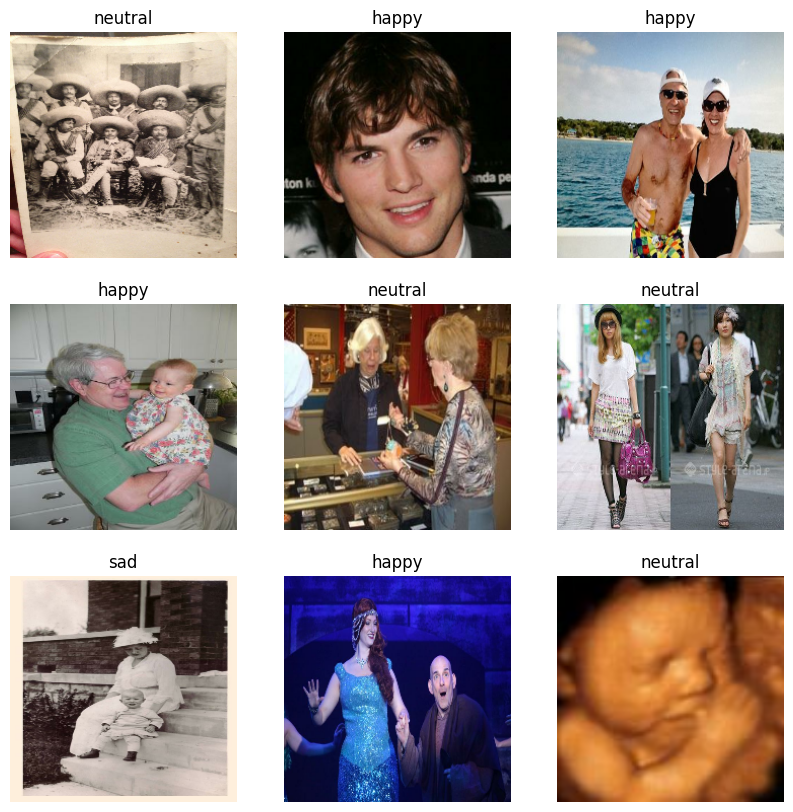

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


#### Preprocessing

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch)
  break
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

(32, 224, 224, 3)
(32,)
tf.Tensor([3 4 3 4 5 3 6 3 3 4 3 4 6 4 2 3 6 4 3 6 6 4 6 3 4 5 3 3 4 3 3 4], shape=(32,), dtype=int32)
0.0 1.0


# Model arctihecture

In [ ]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

# Model Traing

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=train_ds,
  epochs=3
)

Epoch 1/3
206/206 [==============================] - 699s 3s/step - loss: 1.3768 - accuracy: 0.4156 - val_loss: 1.3188 - val_accuracy: 0.4387
Epoch 2/3
206/206 [==============================] - 706s 3s/step - loss: 1.3124 - accuracy: 0.4474 - val_loss: 1.2613 - val_accuracy: 0.4568
Epoch 3/3
206/206 [==============================] - 657s 3s/step - loss: 1.2495 - accuracy: 0.4845 - val_loss: 1.1471 - val_accuracy: 0.5215


# Model Evaluation